# TASK - 3 Car Prediction Price with Machine Learning

### -Denny Thomas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CarPrice.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df.shape

(205, 26)

In [5]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
45,46,0,isuzu D-Max V-Cross,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
175,176,-1,toyota corona,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2414,ohc,four,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988.0
27,28,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558.0
62,63,0,mazda rx-4,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245.0


In [6]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.corr()['price']

C:\Users\seaan\AppData\Local\Temp\ipykernel_4808\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [11]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,161,0,toyota corona,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2094,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,38,47,7738.0
33,34,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0
60,61,0,mazda glc custom l,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df['Company Name']  = df['CarName'].apply(lambda x : x.split()[0])
df.drop('CarName',axis = 1, inplace= True)

df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
def replace(error,correct):
    df['Company Name'] = df['Company Name'].replace(to_replace=error,value=correct)

In [15]:
replace('maxda','mazda')
replace('porcshce','porsche')
replace('Nissan','nissan')
replace('vw','volkswagen')
replace('vokswagen','volkswagen')
replace('toyouta','toyota')

In [16]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df.sample(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
35,36,0,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,54.5,2010,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295.0,honda
176,177,-1,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2414,ohc,four,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898.0,toyota
116,117,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95,4150,28,33,17950.0,peugeot
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
39,40,0,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0,honda


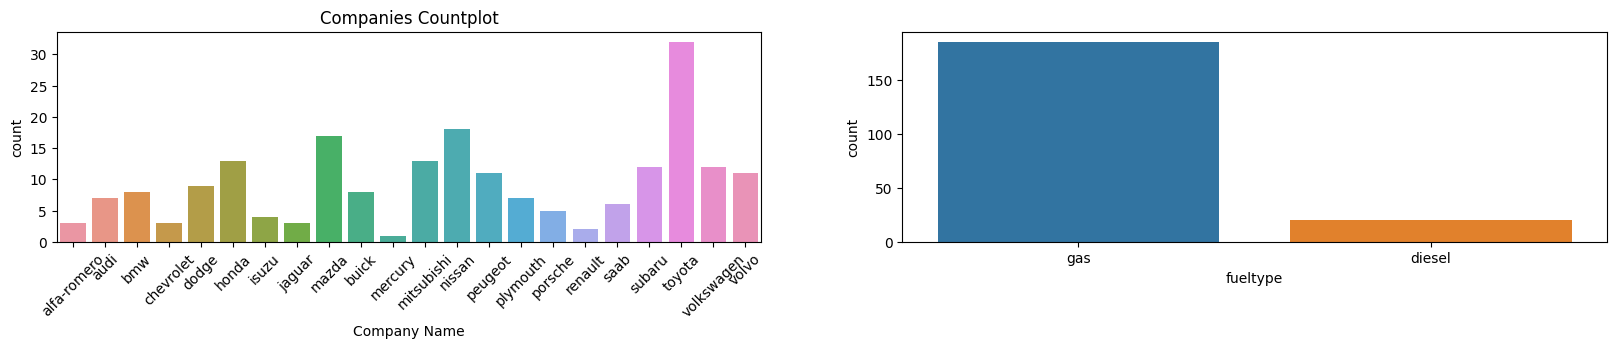

In [18]:
plt.figure(figsize=(20, 6))

plt.subplot(2,2,1)
plt1 = sns.countplot(x='Company Name',data = df)
plt.title('Companies Countplot')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.subplot(2,2,2)
plt2 = sns.countplot(x='fueltype',data = df)

C:\Users\seaan\AppData\Local\Temp\ipykernel_4808\1362734658.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Company Name').mean()['price'].sort_values().plot(kind = 'bar')


<Axes: xlabel='price'>

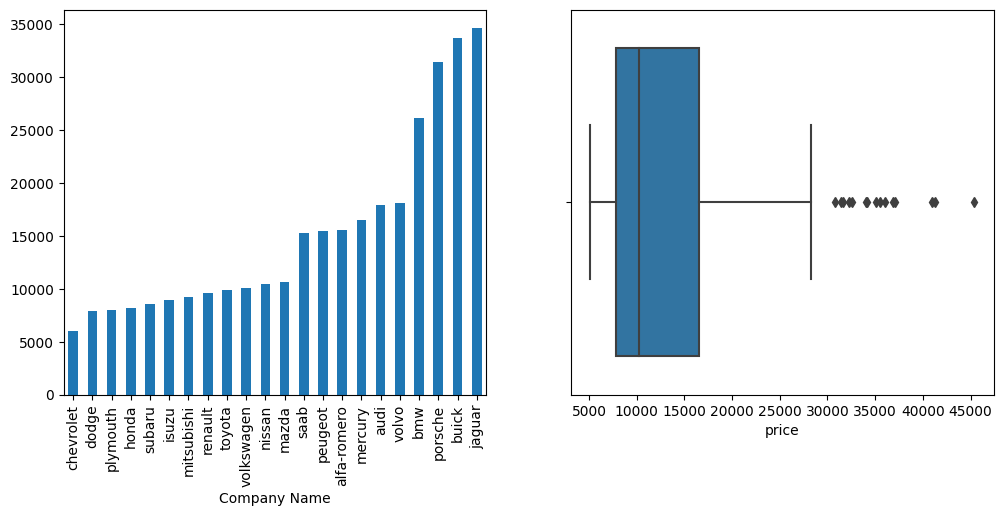

In [19]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
df.groupby('Company Name').mean()['price'].sort_values().plot(kind = 'bar')

plt.subplot(1,2,2)
sns.boxplot(x='price',data = df)

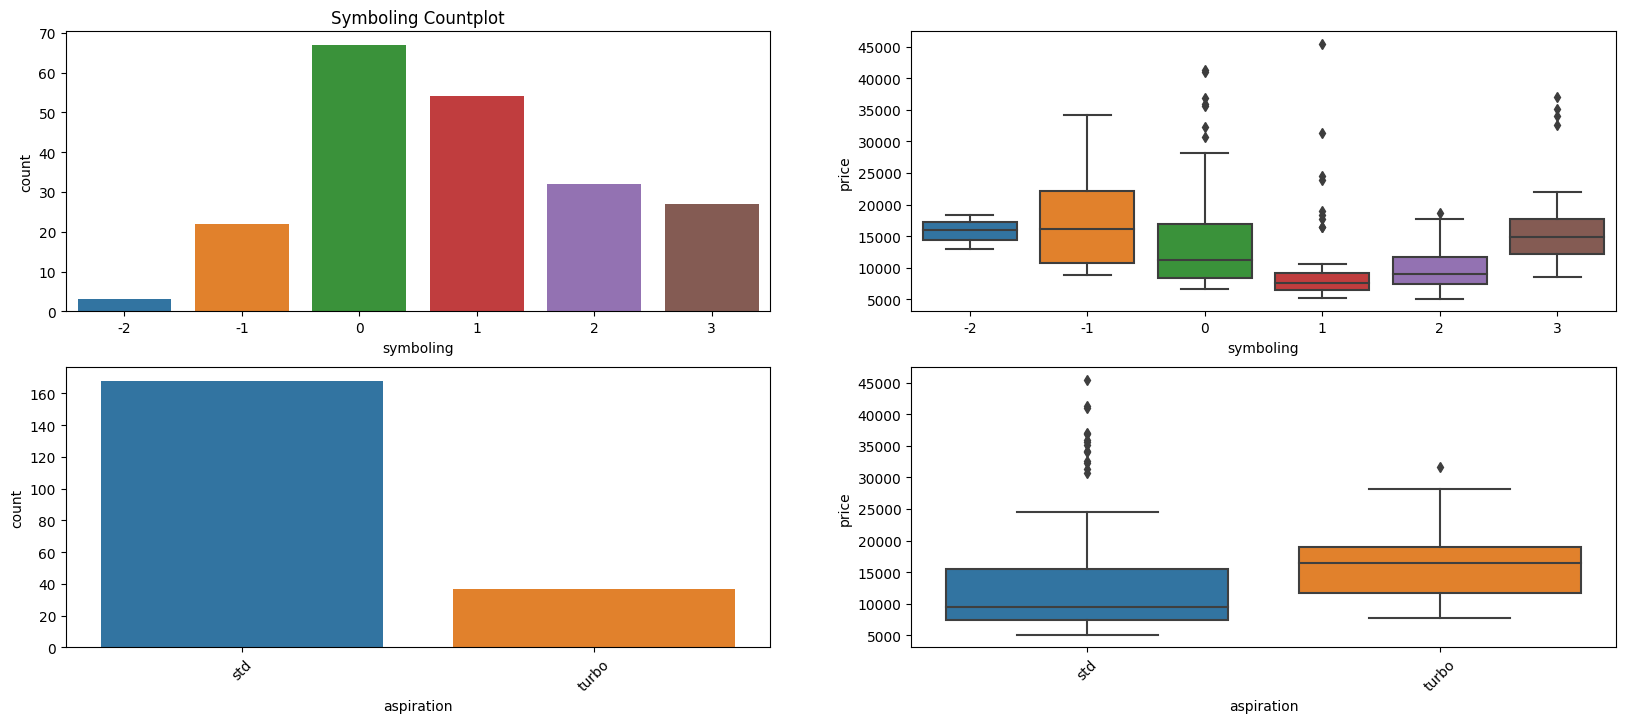

In [20]:
plt.figure(figsize=(20, 8))

plt.subplot(2,2,1)
sns.countplot(x='symboling',data = df)
plt.title('Symboling Countplot')

plt.subplot(2,2,3)
sns.countplot(x='aspiration',data = df)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

plt.subplot(2,2,2)
plt1 = sns.boxplot(x='symboling',y='price',data = df)

plt.subplot(2,2,4)
plt2 = sns.boxplot(x='aspiration',y='price',data = df)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

<Axes: xlabel='Company Name', ylabel='price'>

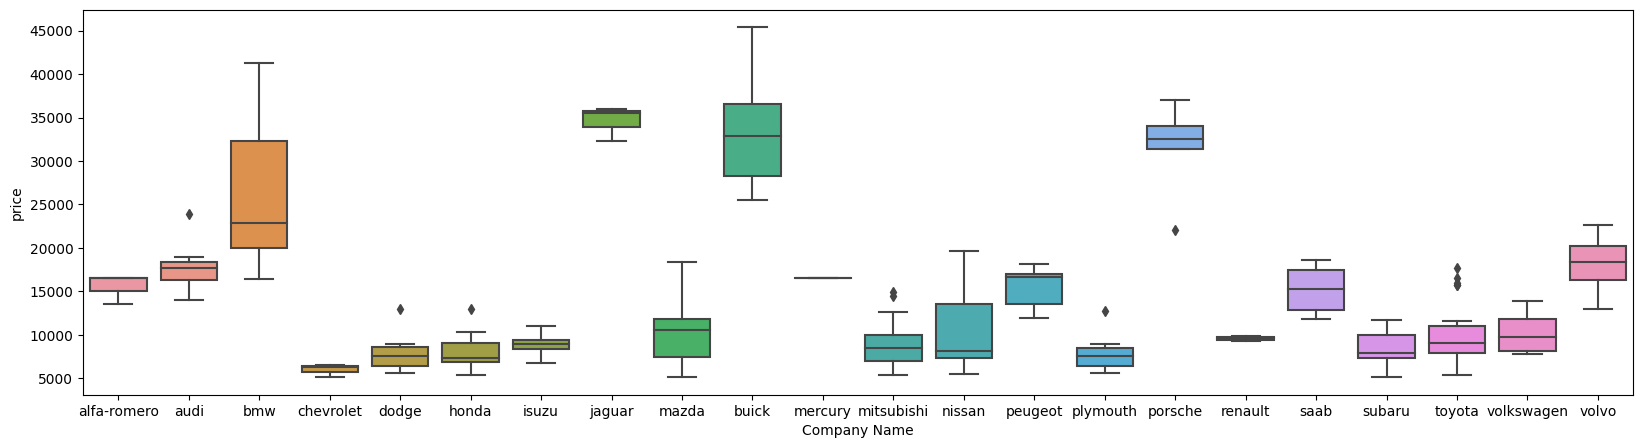

In [21]:
plt.figure(figsize = (20,5))
sns.boxplot(x='Company Name',y = 'price',data = df)

In [22]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

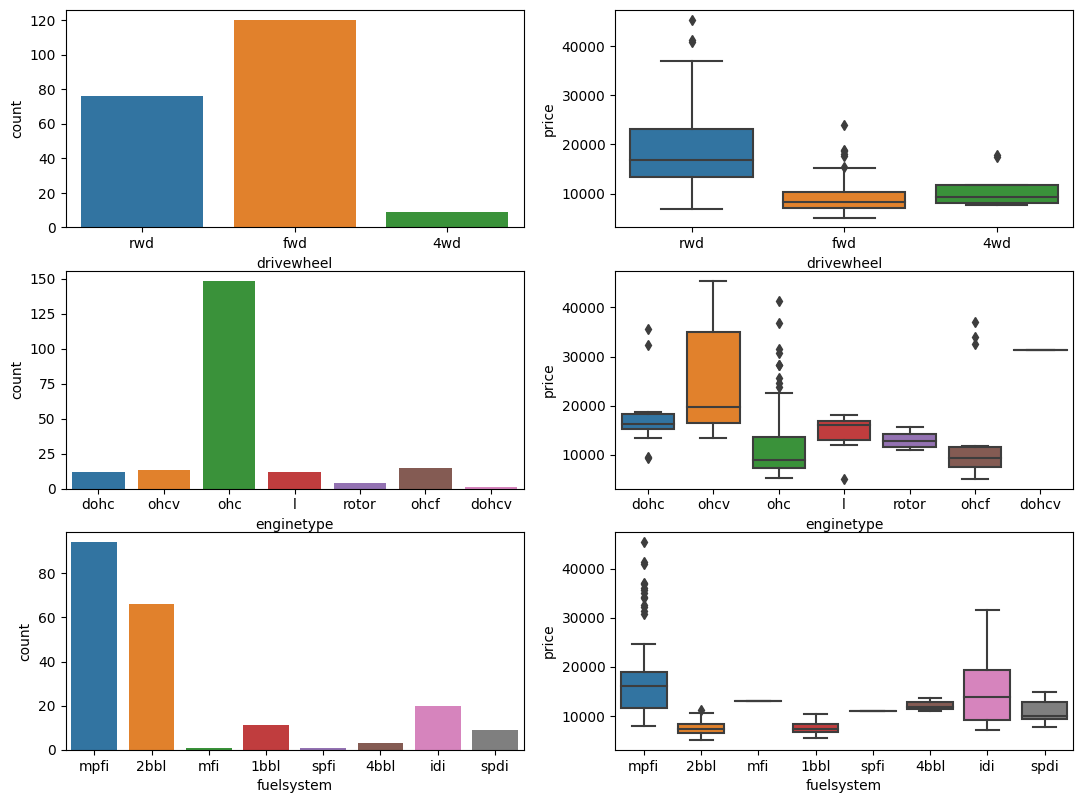

In [23]:
plt.figure(figsize=(13, 13))

plt.subplot(4,2,1)
sns.countplot(x='drivewheel',data = df)
plt.subplot(4,2,2)
sns.boxplot(x='drivewheel',y='price',data = df)
plt.subplot(4,2,3)
sns.countplot(x='enginetype',data = df)

plt.subplot(4,2,4)
sns.boxplot(x='enginetype',y='price',data = df)

plt.subplot(4,2,5)
sns.countplot(x='fuelsystem',data = df)
plt.subplot(4,2,6)
plt1 = sns.boxplot(x='fuelsystem',y='price',data = df)

<Axes: xlabel='enginelocation', ylabel='price'>

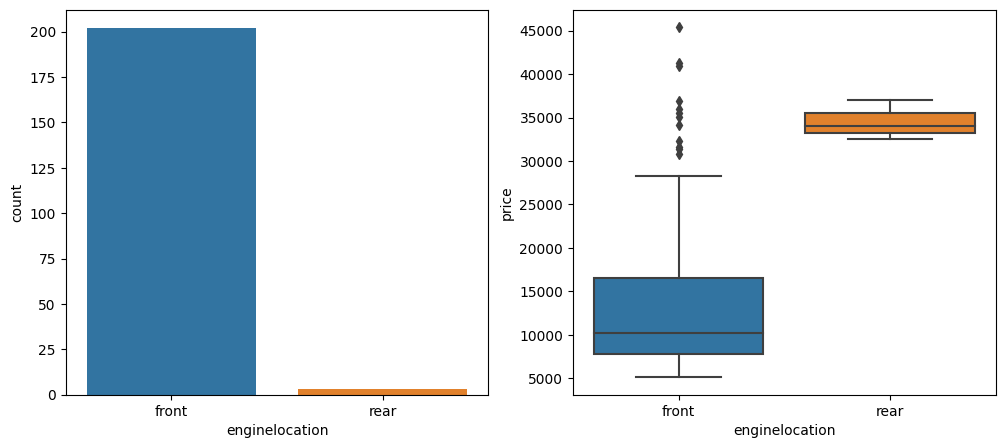

In [24]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(x='enginelocation',data = df)
plt.subplot(1,2,2)
sns.boxplot(x='enginelocation',y='price',data = df)

In [25]:
df.corr()['price'].index

C:\Users\seaan\AppData\Local\Temp\ipykernel_4808\1500054959.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].index


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [26]:
df.corr()['price']

C:\Users\seaan\AppData\Local\Temp\ipykernel_4808\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

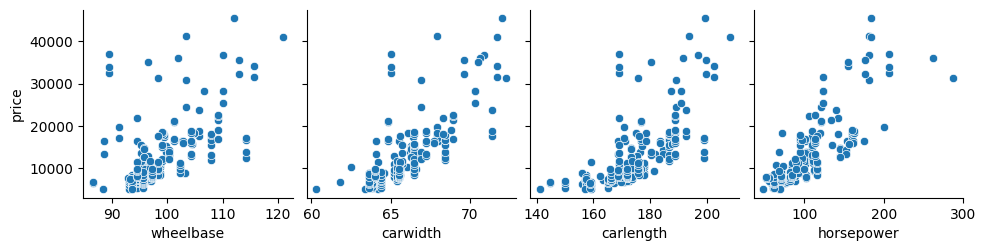

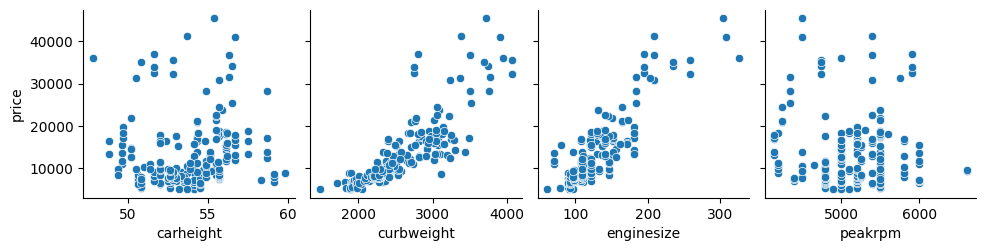

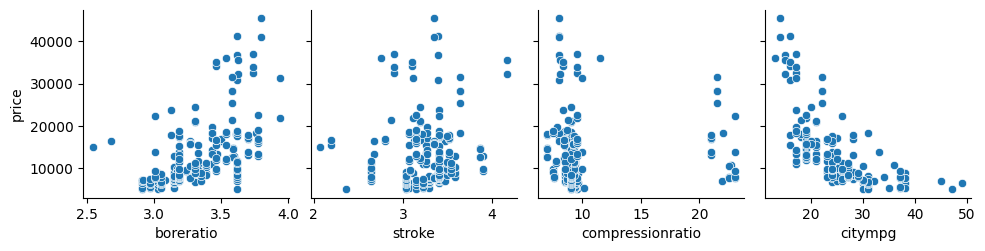

In [27]:
sns.pairplot(x_vars = ['wheelbase','carwidth','carlength','horsepower'],y_vars = ['price'],data = df)
sns.pairplot(x_vars = ['carheight','curbweight','enginesize','peakrpm'],y_vars = ['price'],data = df)
sns.pairplot(x_vars = ['boreratio','stroke','compressionratio','citympg'],y_vars = ['price'],data = df)

C:\Users\seaan\AppData\Local\Temp\ipykernel_4808\4064932829.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

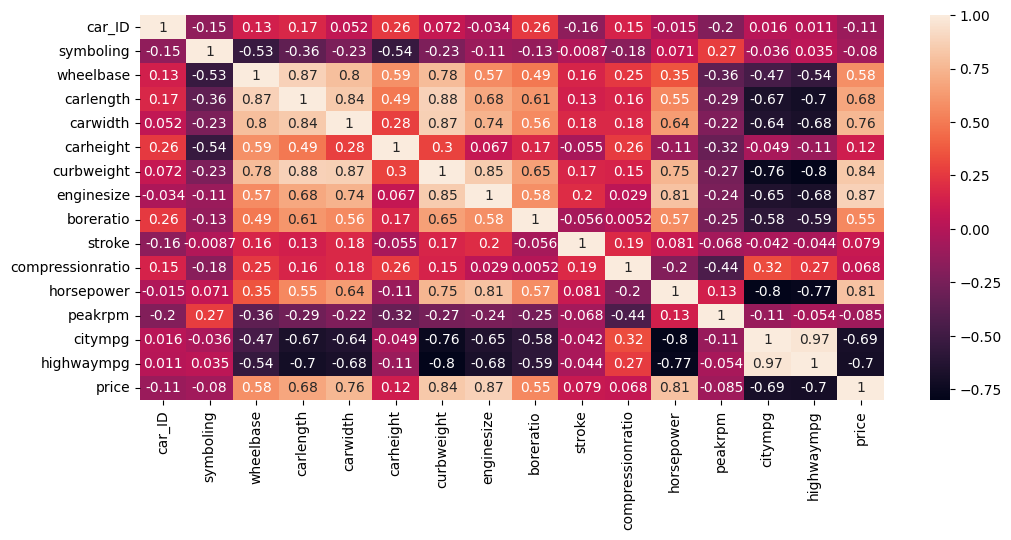

In [28]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(),annot = True)

In [29]:
imp = df[['carwidth','curbweight','enginesize','boreratio','horsepower','highwaympg','citympg','wheelbase']]

In [30]:
imp.corr()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase
carwidth,1.000000,0.867032,0.735433,0.559150,0.640732,-0.677218,-0.642704,0.795144
curbweight,0.867032,1.000000,0.850594,0.648480,0.750739,-0.797465,-0.757414,0.776386
enginesize,0.735433,0.850594,1.000000,0.583774,0.809769,-0.677470,-0.653658,0.569329
boreratio,0.559150,0.648480,0.583774,1.000000,0.573677,-0.587012,-0.584532,0.488750
horsepower,0.640732,0.750739,0.809769,0.573677,1.000000,-0.770544,-0.801456,0.353294
highwaympg,-0.677218,-0.797465,-0.677470,-0.587012,-0.770544,1.000000,0.971337,-0.544082
citympg,-0.642704,-0.757414,-0.653658,-0.584532,-0.801456,0.971337,1.000000,-0.470414
wheelbase,0.795144,0.776386,0.569329,0.488750,0.353294,-0.544082,-0.470414,1.000000


In [31]:
imp = imp.drop('citympg',axis = 1)

In [32]:
num_imp_cols = imp.columns
num_imp_cols

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'highwaympg', 'wheelbase'],
      dtype='object')

In [33]:
num_imp_cols = list(num_imp_cols)

In [34]:
cat = [col for col in df.columns if df[col].dtype == 'object']

In [39]:
from word2number import w2n

In [40]:
df['doornumber'] = df['doornumber'].apply(w2n.word_to_num)

In [41]:
df['cylindernumber'] = df['cylindernumber'].apply(w2n.word_to_num)

In [42]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [43]:
df.corr()['price']

C:\Users\seaan\AppData\Local\Temp\ipykernel_4808\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


car_ID             -0.109093
symboling          -0.079978
doornumber          0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [44]:
num_imp_cols.append('cylindernumber') #adding cylinder number to important numerical column

In [45]:
num_imp_cols.append('price')

In [46]:
fueltype = pd.get_dummies(df['fueltype'],drop_first=True)
aspiration = pd.get_dummies(df['aspiration'],drop_first=True)
carbody = pd.get_dummies(df['carbody'],drop_first=True)
drivewheel = pd.get_dummies(df['drivewheel'],drop_first=True)
enginelocation = pd.get_dummies(df['enginelocation'],drop_first=True)
fuelsystem = pd.get_dummies(df['fuelsystem'],drop_first=True)
CompanyName = pd.get_dummies(df['Company Name'],drop_first=True)
enginetype = pd.get_dummies(df['enginetype'],drop_first=True)

In [47]:
df= df[num_imp_cols]

In [48]:
df.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price
0,64.1,2548,130,3.47,111,27,88.6,4,13495.0
1,64.1,2548,130,3.47,111,27,88.6,4,16500.0
2,65.5,2823,152,2.68,154,26,94.5,6,16500.0
3,66.2,2337,109,3.19,102,30,99.8,4,13950.0
4,66.4,2824,136,3.19,115,22,99.4,5,17450.0


In [49]:
df = pd.concat([df,fueltype,aspiration,carbody,drivewheel,enginelocation,fuelsystem,enginetype,CompanyName],axis = 1)

In [50]:
df.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,64.1,2548,130,3.47,111,27,88.6,4,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,64.1,2548,130,3.47,111,27,88.6,4,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,65.5,2823,152,2.68,154,26,94.5,6,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,66.2,2337,109,3.19,102,30,99.8,4,13950.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66.4,2824,136,3.19,115,22,99.4,5,17450.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('price',axis = 1)
y = df['price']

In [53]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
df_train.shape

(143, 52)

In [55]:
df_test.shape

(62, 52)

In [56]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()

scaler.fit(df_train[num_imp_cols])

StandardScaler()

In [57]:
df_train[num_imp_cols] = scaler.transform(df_train[num_imp_cols])

In [58]:
df_train.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,1.025419,-0.811836,-0.351431,-0.700201,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1.114978,0.439415,0.637806,2.432256,1.021826,-0.557490,-0.677177,-0.351431,1.151929,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,-0.269688,-0.677177,-0.351431,-0.452248,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.557490,-1.670284,-0.351431,0.442646,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.616439,1.137720,0.123485,1.201877,1.501822,-1.276993,0.972390,-0.351431,0.757569,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
X_train,y_train = df_train.drop('price',axis = 1),df_train['price']

In [60]:
df_test[num_imp_cols] = scaler.transform(df_test[num_imp_cols])

In [61]:
df_test.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,-0.652569,-0.820850,-0.660242,-0.451443,-0.822372,2.320526,-0.475189,-0.351431,-0.683619,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,-0.154030,-0.487359,-0.390836,-0.451443,-0.443427,0.449816,-0.205872,-0.351431,-0.586315,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,0.299187,-0.284685,-0.072447,0.317543,-0.468690,0.162014,0.046613,-0.351431,-0.541326,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,-0.833856,-0.505784,-0.660242,-0.259197,0.238673,-0.269688,-0.677177,-0.351431,-0.483097,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,-0.924500,-0.551846,-0.415328,1.201877,-0.746583,0.018113,-0.879165,-0.351431,-0.700972,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
X_test = df_test.drop('price',axis = 1)
y_test = df_test['price']

# Prediction Using Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9070132225857479

In [64]:
y_pred = rfr.predict(X_test)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

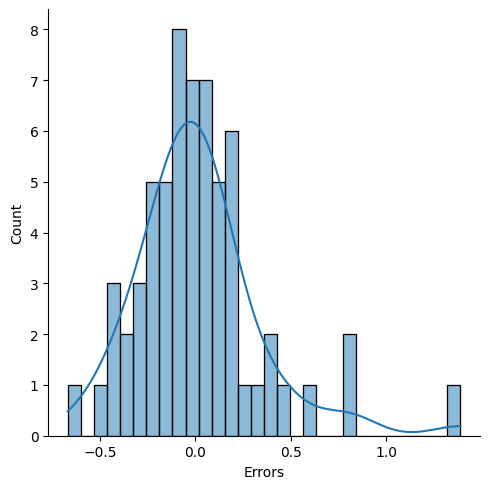

In [65]:
#Residual Analysis
fig = plt.figure()
sns.displot((y_test - y_pred),bins = 30,kde= True)
fig.suptitle('Error Terms')       
plt.xlabel('Errors')  

Text(0, 0.5, 'y_pred')

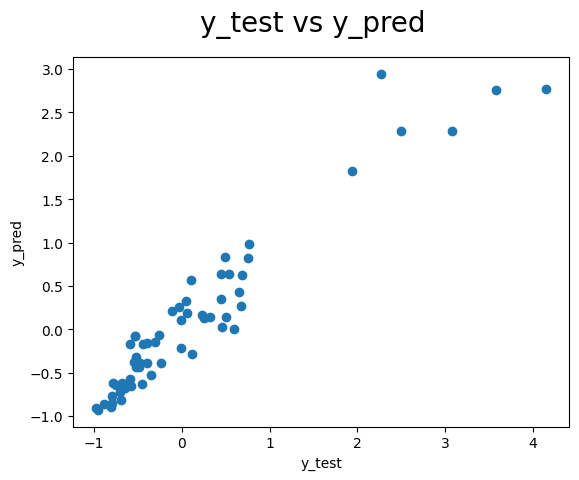

In [66]:
#EVALUATION OF THE MODEL
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)          
plt.xlabel('y_test')                        
plt.ylabel('y_pred')